In [1]:
from lib.data import *
data, raw = get_default_oec_rca_raw_data()

Se cargaron los datos desde ../data/default_oce_2018-2020.pkl


In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
import economic_complexity as ecplx

rca = ecplx.rca(data)
M = build_M_from(rca)
cant_paises = len(M.index.to_list())

In [4]:
#from informe import SimuladorEstatico, SimuladorDinamico, SimuladorComplejo, PaisNaive
from informe import *
from lib.utils import *#correr_simulacion_mostrando, cantidad_descubrimientos_iteracion

Usando el valor de $\Omega$ hallado nos preguntamos como afecta la estrategia en la evolución en complejidad de los paises.

Para esto dividimos en dos porciones los paises según dos clases, el 50% más complejo y el 50% menos complejo y probamos asignarle a cada clase un distinto tiempo de estrategia. 

Para eso primero necesitamos obtener la distribución de complejidades para cada país:

In [5]:
ECI, PCI = ecplx.complexity(M)

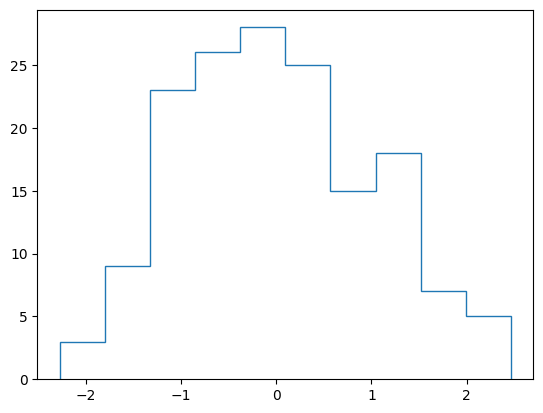

In [6]:
counts, bins = np.histogram(list(ECI), 10)
plt.stairs(counts, bins)

lo que es bastante aproximado a lo esperado:
![image.png](attachment:c07f20e8-0e32-4864-b7af-bc10d9f6a727.png)

 una distribución normal ~(0,1)

In [7]:
np.std(ECI)

0.9968503858773891

In [8]:
from informe import PaisCigarra, PaisHormiga

iteraciones = 35
omega = 0.55

def pais_factory_segun_complejidad(clase_simple, clase_complejo):
    return lambda **constructor_args: clase_complejo(**constructor_args) \
                                      if constructor_args["eci"] > 0 else clase_simple(**constructor_args)

In [9]:
sim_simplesHormigas_complejosHormigas = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_simple=PaisHormiga, clase_complejo=PaisHormiga), 
                      M.copy(deep=True), omega)
sim_simplesHormigas_complejosCigarras = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_simple=PaisHormiga, clase_complejo=PaisCigarra), 
                      M.copy(deep=True), omega)
sim_simplesCigarras_complejosHormigas = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_simple=PaisCigarra, clase_complejo=PaisHormiga), 
                      M.copy(deep=True), omega)
sim_simplesCigarras_complejosCigarras = \
    SimuladorComplejo(lambda step: step >= iteraciones, 
                      pais_factory_segun_complejidad(clase_simple=PaisCigarra, clase_complejo=PaisCigarra), 
                      M.copy(deep=True), omega)

proximidad calculada en: 0.20807385444641113
paises creados en: 0.013852596282958984
proximidad calculada en: 0.325059175491333
paises creados en: 0.01506495475769043
proximidad calculada en: 0.19118642807006836
paises creados en: 0.014705419540405273
proximidad calculada en: 0.19550728797912598
paises creados en: 0.014850854873657227


In [10]:
from lib.utils import correr_simulacion_mostrando

def pais_eci_collector(output, pais, productos_terminados):
    output[pais] = (pais.get_eci(), productos_terminados)

res_simplesHormigas_complejosHormigas = correr_simulacion_mostrando(sim_simplesHormigas_complejosHormigas, collector=pais_eci_collector, formatter=pais_con_producciones_e_investigaciones_formatter)
print("#################################### simulación hormigas hormigas terminada #################################")
res_simplesHormigas_complejosCigarras = correr_simulacion_mostrando(sim_simplesHormigas_complejosCigarras, collector=pais_eci_collector, formatter=pais_con_producciones_e_investigaciones_formatter)
print("#################################### simulación hormigas cigarras terminada #################################")
res_simplesCigarras_complejosHormigas = correr_simulacion_mostrando(sim_simplesCigarras_complejosHormigas, collector=pais_eci_collector, formatter=pais_con_producciones_e_investigaciones_formatter)
print("#################################### simulación cigarras hormigas terminada #################################")
res_simplesCigarras_complejosCigarras = correr_simulacion_mostrando(sim_simplesCigarras_complejosCigarras, collector=pais_eci_collector, formatter=pais_con_producciones_e_investigaciones_formatter)
print("#################################### simulación cigarras cigarras terminada #################################")

empezando simulación: 2024-06-30 23:52:40
iteración: 1
	PaisHormiga(Afghanistan)----------------> descubrió 2 en investiación: 1
	PaisHormiga(Albania)--------------------> descubrió 2 en investiación: 11
	PaisHormiga(Algeria)--------------------> descubrió 2 en investiación: 1
	PaisHormiga(Angola)---------------------> descubrió 2 en investiación: 0
	PaisHormiga(Argentina)------------------> descubrió 2 en investiación: 6
	PaisHormiga(Armenia)--------------------> descubrió 2 en investiación: 9
	PaisHormiga(Australia)------------------> descubrió 2 en investiación: 5
	PaisHormiga(Austria)--------------------> descubrió 2 en investiación: 12
	PaisHormiga(Azerbaijan)-----------------> descubrió 2 en investiación: 2
	PaisHormiga(Bahamas)--------------------> descubrió 2 en investiación: 6
	PaisHormiga(Bahrain)--------------------> descubrió 2 en investiación: 10
	PaisHormiga(Bangladesh)-----------------> descubrió 2 en investiación: 1
	PaisHormiga(Belarus)--------------------> descubrió 2

In [11]:
# para cada iteración, me quedo con la dispersión:
def obtener_complejidades(data):
    res = []
    for iteracion in data:
        eci_it = np.array([eci for eci, _ in iteracion.values()])
        res.append(eci_it)
    return res

comp_simplesHormigas_complejosHormigas = obtener_complejidades(res_simplesHormigas_complejosHormigas)
comp_simplesHormigas_complejosCigarras = obtener_complejidades(res_simplesHormigas_complejosCigarras)
comp_simplesCigarras_complejosHormigas = obtener_complejidades(res_simplesCigarras_complejosHormigas)
comp_simplesCigarras_complejosCigarras = obtener_complejidades(res_simplesCigarras_complejosCigarras)

In [12]:
comp_simplesHormigas_complejosHormigas

[array([-1.21518207, -0.34403057, -1.03954786, -1.13990654, -0.1795175 ,
        -0.11763378, -0.56324305,  1.69093703, -0.87279477,  0.6325915 ,
         0.53079369, -0.79544309,  0.92530567,  1.24269612, -0.48795022,
        -1.04702803,  0.611169  , -0.77395428,  0.24535462,  0.49716217,
         0.58573475, -1.55214587, -0.8722705 , -0.57212804, -1.14401282,
         0.56791384,  0.21651651, -2.27339722, -0.24997247,  1.24806389,
         2.35818435,  0.23577558,  0.257417  , -0.97661347,  0.86360188,
        -0.63973247,  0.43646075,  1.68391554, -1.01025016,  1.06674602,
        -0.12983504, -0.86439568, -0.12329234,  0.14190531, -1.84088449,
         1.03346726,  0.22908533, -0.76082284, -0.2713261 ,  1.52212175,
         1.41508772, -0.65020826, -0.18573995,  2.02374729, -1.21219947,
         0.18159617, -1.35099832, -0.23486344, -1.47356404, -1.19964029,
        -0.79440893, -0.3646685 ,  1.22793462,  1.42188047,  0.33949742,
         0.52214003, -0.03178322, -0.13323264, -0.9

In [13]:
res_simplesHormigas_complejosHormigas

[{<informe.PaisHormiga at 0x7eac59ea4cd0>: (-1.2151820657187424, []),
  <informe.PaisHormiga at 0x7eac59ea6f50>: (-0.3440305718689615, []),
  <informe.PaisHormiga at 0x7eac59ea6e60>: (-1.0395478566628797, []),
  <informe.PaisHormiga at 0x7eac59ea6ef0>: (-1.139906536675698, []),
  <informe.PaisHormiga at 0x7eac59ea4b50>: (-0.17951749772442566, []),
  <informe.PaisHormiga at 0x7eac59ea6e30>: (-0.11763377770885733, []),
  <informe.PaisHormiga at 0x7eac59eedf00>: (-0.5632430529761895, []),
  <informe.PaisHormiga at 0x7eac59eeded0>: (1.690937031978024, []),
  <informe.PaisHormiga at 0x7eac59d6fca0>: (-0.8727947661629551, []),
  <informe.PaisHormiga at 0x7eac59d6efe0>: (0.6325914980459536, []),
  <informe.PaisHormiga at 0x7eac59d6ef80>: (0.5307936942962616, []),
  <informe.PaisHormiga at 0x7eac59d6ebf0>: (-0.7954430873059571, []),
  <informe.PaisHormiga at 0x7eac59d6edd0>: (0.9253056690963005, []),
  <informe.PaisHormiga at 0x7eac59d6efb0>: (1.2426961164041903, []),
  <informe.PaisHormiga at

In [14]:
comp_simplesCigarras_complejosHormigas

[array([-1.21518207, -0.34403057, -1.03954786, -1.13990654, -0.1795175 ,
        -0.11763378, -0.56324305,  1.69093703, -0.87279477,  0.6325915 ,
         0.53079369, -0.79544309,  0.92530567,  1.24269612, -0.48795022,
        -1.04702803,  0.611169  , -0.77395428,  0.24535462,  0.49716217,
         0.58573475, -1.55214587, -0.8722705 , -0.57212804, -1.14401282,
         0.56791384,  0.21651651, -2.27339722, -0.24997247,  1.24806389,
         2.35818435,  0.23577558,  0.257417  , -0.97661347,  0.86360188,
        -0.63973247,  0.43646075,  1.68391554, -1.01025016,  1.06674602,
        -0.12983504, -0.86439568, -0.12329234,  0.14190531, -1.84088449,
         1.03346726,  0.22908533, -0.76082284, -0.2713261 ,  1.52212175,
         1.41508772, -0.65020826, -0.18573995,  2.02374729, -1.21219947,
         0.18159617, -1.35099832, -0.23486344, -1.47356404, -1.19964029,
        -0.79440893, -0.3646685 ,  1.22793462,  1.42188047,  0.33949742,
         0.52214003, -0.03178322, -0.13323264, -0.9

In [15]:
comp_simplesCigarras_complejosCigarras

[array([-1.21518207, -0.34403057, -1.03954786, -1.13990654, -0.1795175 ,
        -0.11763378, -0.56324305,  1.69093703, -0.87279477,  0.6325915 ,
         0.53079369, -0.79544309,  0.92530567,  1.24269612, -0.48795022,
        -1.04702803,  0.611169  , -0.77395428,  0.24535462,  0.49716217,
         0.58573475, -1.55214587, -0.8722705 , -0.57212804, -1.14401282,
         0.56791384,  0.21651651, -2.27339722, -0.24997247,  1.24806389,
         2.35818435,  0.23577558,  0.257417  , -0.97661347,  0.86360188,
        -0.63973247,  0.43646075,  1.68391554, -1.01025016,  1.06674602,
        -0.12983504, -0.86439568, -0.12329234,  0.14190531, -1.84088449,
         1.03346726,  0.22908533, -0.76082284, -0.2713261 ,  1.52212175,
         1.41508772, -0.65020826, -0.18573995,  2.02374729, -1.21219947,
         0.18159617, -1.35099832, -0.23486344, -1.47356404, -1.19964029,
        -0.79440893, -0.3646685 ,  1.22793462,  1.42188047,  0.33949742,
         0.52214003, -0.03178322, -0.13323264, -0.9

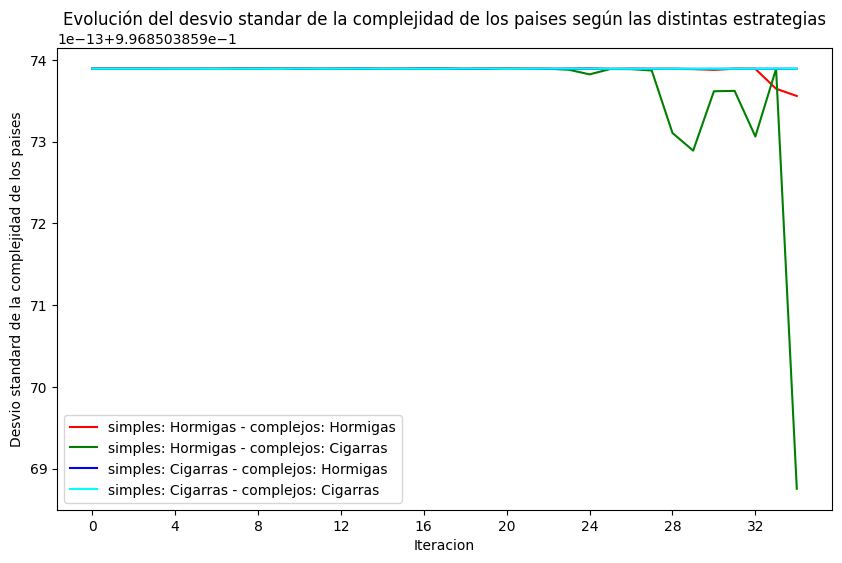

In [16]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 6))
fig.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

stds_sH_cH = [np.std(x) for x in comp_simplesHormigas_complejosHormigas]
stds_sH_cC = [np.std(x) for x in comp_simplesHormigas_complejosCigarras]
stds_sC_cH = [np.std(x) for x in comp_simplesCigarras_complejosHormigas]
stds_sC_cC = [np.std(x) for x in comp_simplesCigarras_complejosCigarras]

plt.plot(range(len(comp_simplesHormigas_complejosHormigas)), stds_sH_cH, 
         label='simples: Hormigas - complejos: Hormigas', color = "r", linestyle='-')
plt.plot(range(len(comp_simplesHormigas_complejosCigarras)), stds_sH_cC, 
         label='simples: Hormigas - complejos: Cigarras', color = "g", linestyle='-')
plt.plot(range(len(comp_simplesCigarras_complejosHormigas)), stds_sC_cH, 
         label='simples: Cigarras - complejos: Hormigas', color = "b", linestyle='-')
plt.plot(range(len(comp_simplesCigarras_complejosCigarras)), stds_sC_cC, 
         label='simples: Cigarras - complejos: Cigarras', color = "cyan", linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Desvio standard de la complejidad de los paises')
plt.title('Evolución del desvio standar de la complejidad de los paises según las distintas estrategias')
plt.legend()
plt.show()

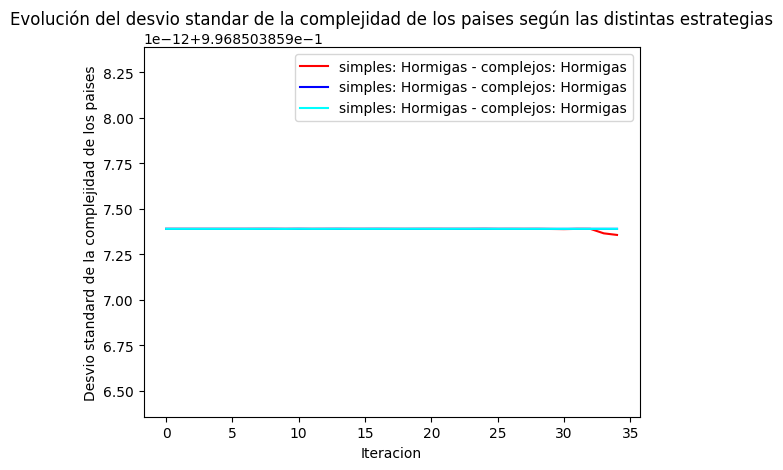

In [17]:
plt.plot(range(len(comp_simplesHormigas_complejosHormigas)), stds_sH_cH, 
         label='simples: Hormigas - complejos: Hormigas', color = "r", linestyle='-')
#plt.plot(range(len(comp_simplesHormigas_complejosCigarras)), stds_sH_cC, 
         #label='simples: Hormigas - complejos: Hormigas', color = "g", linestyle='-')
plt.plot(range(len(comp_simplesCigarras_complejosHormigas)), stds_sC_cH, 
         label='simples: Hormigas - complejos: Hormigas', color = "b", linestyle='-')
plt.plot(range(len(comp_simplesCigarras_complejosCigarras)), stds_sC_cC, 
         label='simples: Hormigas - complejos: Hormigas', color = "cyan", linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Desvio standard de la complejidad de los paises')
plt.title('Evolución del desvio standar de la complejidad de los paises según las distintas estrategias')
plt.legend()
plt.show()

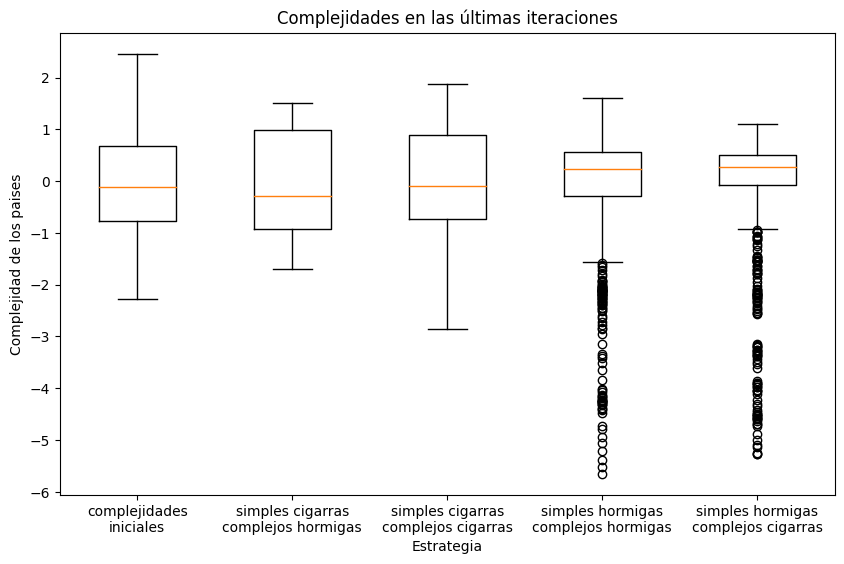

In [18]:
strat_std = {}
strat_std["complejidades\niniciales"] = ECI
strat_std["simples cigarras\ncomplejos hormigas"] = np.concatenate(comp_simplesCigarras_complejosHormigas[-10:-1])
strat_std["simples cigarras\ncomplejos cigarras"] = np.concatenate(comp_simplesCigarras_complejosCigarras[-10:-1])

strat_std["simples hormigas\ncomplejos hormigas"] = np.concatenate(comp_simplesHormigas_complejosHormigas[-10:-1])
strat_std["simples hormigas\ncomplejos cigarras"] = np.concatenate(comp_simplesHormigas_complejosCigarras[-10:-1])

fig = plt.figure(figsize=(10, 6))
ax = plt.boxplot(strat_std.values())
fig.gca().set_xticklabels(list(strat_std.keys()))
plt.xlabel('Estrategia')
plt.ylabel('Complejidad de los paises')
plt.title(f'Complejidades en las últimas iteraciones')
plt.show()